# NEURAL NETWORK EXAMPLES  
#### (FNN with BP & DNN)

In [2]:
%matplotlib inline

from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer
from matplotlib import pyplot as plt
import numpy as np
from pybrain.utilities import percentError
#from pybrain.datasets import SequenceClassificationDataSet

In [3]:
from pybrain.structure import *
fnn=FeedForwardNetwork()
inlayer=LinearLayer(4,name='input')
hiddenlayer0=SigmoidLayer(8,name='train_layer0')
hiddenlayer1=SigmoidLayer(10,name='train_layer1')
hiddenlayer2=SigmoidLayer(6,name='train_layer2')
outlayer=SoftmaxLayer(3,name='output')

fnn.addInputModule(inlayer)
fnn.addModule(hiddenlayer0)
fnn.addModule(hiddenlayer1)
fnn.addModule(hiddenlayer2)
fnn.addOutputModule(outlayer)
fnn.addModule(BiasUnit(name='bias'))

In [4]:
fnn.addConnection(FullConnection(inlayer,hiddenlayer0))
fnn.addConnection(FullConnection(hiddenlayer0,hiddenlayer1))
fnn.addConnection(FullConnection(hiddenlayer1,hiddenlayer2))
fnn.addConnection(FullConnection(hiddenlayer2,outlayer))
fnn.addConnection(FullConnection(fnn['bias'],hiddenlayer0))
#fnn.addConnection(FullConnection(fnn['bias'],hiddenlayer2))

fnn.sortModules()

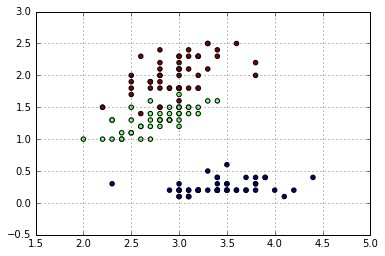

In [5]:
from sklearn import datasets
from matplotlib import pyplot as plt
iris=datasets.load_iris()
x=iris.data
y=iris.target
plt.scatter(x=iris.data[:,1],y=iris.data[:,3],marker='o',c=iris.target)
plt.grid(True)
plt.show()
from pybrain.datasets import ClassificationDataSet
DS=ClassificationDataSet(4,1,nb_classes=3)#DS的格式是4个/列特征值，1列结果，其中1列结果有3类
for i in xrange(len(y)):
    DS.addSample(x[i],y[i])
#print DS['input'],DS['target']
trndata,tstdata=DS.splitWithProportion(0.8)
trndata._convertToOneOfMany()#将1列结果转换成3列结果，便于训练网络
tstdata._convertToOneOfMany()

#print trndata['input'],trndata['target']

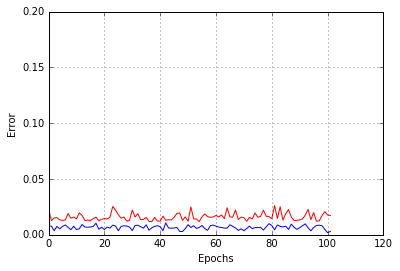

301


In [8]:
from pybrain.supervised.trainers import BackpropTrainer
trainer=BackpropTrainer(fnn,trndata,learningrate=0.01,verbose=False)
trnerr,valerr=trainer.trainUntilConvergence(dataset=trndata,maxEpochs=100)
#trainer.train()
trainer.trainOnDataset(trndata,200)#训练200次，加上前面的100次
plt.plot(trnerr,'b',valerr,'r')
plt.grid(True)
plt.xlim([0.0, 120.0])
plt.ylim([0.0, 0.20])
plt.xlabel('Epochs')
plt.ylabel('Error')

plt.show()
print trainer.totalepochs

In [9]:
out=fnn.activateOnDataset(tstdata).argmax(axis=1)
xnew=[2,3,2,3]
out2=fnn.activate(xnew).argmax()
print out,out2
print 'precsion:',(100-percentError(out,tstdata['class']))

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2] 0
precsion: 100.0


In [10]:
for mod in fnn.modules:
  print "Module:", mod.name
  if mod.paramdim > 0:
    print "--parameters:", mod.params
  for conn in fnn.connections[mod]:
    print "-connection to", conn.outmod.name
    if conn.paramdim > 0:
       print "- parameters", conn.params
  if hasattr(fnn, "recurrentConns"):
    print "Recurrent connections"
    for conn in fnn.recurrentConns:             
       print "-", conn.inmod.name, " to", conn.outmod.name
       if conn.paramdim > 0:
          print "- parameters", conn.params

Module: input
-connection to train_layer0
- parameters [ 3.15295711  1.59802426 -4.28892738 -4.67918613 -1.32456137 -0.91532385
 -0.21557988  0.21272719 -0.66047028 -0.46400782  0.76931202  1.98339834
 -0.57694408  2.59851552 -1.2324516  -0.99744907  2.31834107  0.32742986
 -0.97870358  1.08443319  0.85988657 -0.09389044  0.57373627 -1.5745805
  1.65521531  0.18395837 -0.80627784  0.02736158 -0.81502082  1.64593346
 -0.29140492 -1.10921867]
Module: train_layer2
-connection to output
- parameters [ 1.61435137 -5.14237979  3.17266912  5.62504331 -1.88925292 -2.65851038
  1.86007978  2.99154989  0.95008681 -0.3069516  -2.33221729  0.86925221
 -2.08769458  2.40892139 -2.69497394 -2.29893302  5.6942352   0.94358918]
Module: bias
-connection to train_layer0
- parameters [ 3.3646904   1.07375365 -0.43329884  0.82541143  0.06597831 -0.85676102
 -0.19871993  1.48515092]
Module: train_layer0
-connection to train_layer1
- parameters [-0.94900598  0.36967735  1.03738683 -2.52890467  0.4938197   0.

In [112]:
import sklearn.neural_network.MLPClassifier
iris=datasets.load_iris()
x=iris.data
y=iris.target

ImportError: No module named MLPClassifier